## Introduction
Welcome! Today, we unfold the mysteries of fine-tuning Autoencoders. We learned about Autoencoders and their value in dimensionality reduction. Now, we'll delve into Hyperparameters — adjustable pre-training variables that optimize model performance. We'll experiment with different architectures (altering layers and activations) and training parameters (tweaking learning rates and batch sizes) of an Autoencoder using Python. Ready for the exploration voyage? Off we go!

## Hyperparameters: Tuning Essentials
Hyperparameters, serving as a model's adjustable knobs, influence how a machine learning model learns. Classified into architectural and learning types, they're vital for managing a model's complexity. Architectural hyperparameters encompass elements like hidden layers and units in a neural network. In contrast, learning hyperparameters include the learning rate, epochs, and batch sizes.



## Experimenting with New Architectures
Architectural Hyperparameters define layers and units in a network. Layers are computational constructs that transform input data, and units produce activations. Now, let's modify our Autoencoder and experiment with different activation functions:

In [1]:
# Import necessary libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Define the function to create an autoencoder
def create_autoencoder(input_dim, encoded_dim, learning_rate):
    input_layer = Input(shape=(input_dim,))
    # Add a dense layer with 64 neurons and 'relu' activation
    encoded = Dense(encoded_dim, activation='relu')(input_layer)
    # Add another dense layer
    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(Adam(learning_rate), loss='mean_squared_error')
    return autoencoder

2024-06-27 08:54:02.412751: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 08:54:02.412979: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 08:54:02.415853: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 08:54:02.452387: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 08:54:03.264147: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

## Enhancing Learning Hyperparameters
Learning Hyperparameters, such as learning rate and batch size, significantly impact training. Let's measure their influence by tweaking them in our Autoencoder.

In [2]:
# Simulate training and testing data (randomly generated for the example)
x_train = np.random.random((1000, 20))
x_test = np.random.random((300, 20))

# Training with a higher learning_rate
learning_rate = 0.1
autoencoder = create_autoencoder(20, 16, learning_rate)
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0903 - val_loss: 0.0826
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0822 - val_loss: 0.0808
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0803 - val_loss: 0.0801
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0800 - val_loss: 0.0797
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0792 - val_loss: 0.0799
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0796 - val_loss: 0.0797
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0789 - val_loss: 0.0794
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0787 - val_loss: 0.0793
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0783 - val_loss: 0.0794
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0788 - val_loss: 0.0795
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0784 - val_loss: 0.0794
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0788 - val_loss: 0.0794
Epoch 13

Now, we'll use a slower learning rate with the same architecture and compare.

In [3]:
# Training with a slower learning_rate
learning_rate = 0.01

autoencoder_slow = create_autoencoder(20, 16, learning_rate)
autoencoder_slow.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0893 - val_loss: 0.0830
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0825 - val_loss: 0.0800
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0794 - val_loss: 0.0769
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0760 - val_loss: 0.0739
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0727 - val_loss: 0.0698
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0691 - val_loss: 0.0657
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0652 - val_loss: 0.0618
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0607 - val_loss: 0.0583
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0572 - val_loss: 0.0549
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0548 - val_loss: 0.0521
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0511 - val_loss: 0.0493
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0485 - val_loss: 0.0469
Epoch 13/

## Analyzing Hyperparameters Impact
Let's compare the model performances through reconstruction errors. Lower errors indicate better performances.

In [4]:
decoded_imgs_fast = autoencoder.predict(x_test)
decoded_imgs_slow = autoencoder_slow.predict(x_test)

reconstruction_error_fast = np.mean((x_test - decoded_imgs_fast) ** 2)
reconstruction_error_slow = np.mean((x_test - decoded_imgs_slow) ** 2)

print(f"Reconstruction error (fast learning rate): {reconstruction_error_fast}") # ~0.07
print(f"Reconstruction error (slow learning rate): {reconstruction_error_slow}") # ~0.03

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Reconstruction error (fast learning rate): 0.07921227763631411
Reconstruction error (slow learning rate): 0.030933214013002582


These lines of code demonstrate the influence of learning rate and serve as a guided path to delve deeper into Hyperparameters tuning. We can compare the reconstruction error of the two models to see the impact of the learning rate on the performance of the autoencoder. The model trained with a slower learning rate has a lower reconstruction error, indicating better performance – note, that the ouptut values may vary due to randomness and library versions used.

## Conclusion and Exercise
Great job! Today, we explored fine-tuning Autoencoders through adjusting Hyperparameters. Your next step? Hands-on experimentation! Vary the settings and observe how they affect performance. Up next: a voyage into Loss Functions and Optimizers for Autoencoders. Keep exploring!

## Observing Autoencoder Performance with Different Learning Rates

Want to see an autoencoder in action? The given code defines an autoencoder with various learning rates and trains it on simulated data. Run the code to observe how the learning rates you've learned about in the lesson impact the model's performance. Watch the magic unfold without writing a single line of code!

In [5]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

# Define the function to create an autoencoder
def create_autoencoder(input_dim, encoded_dim, learning_rate):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(input_dim, activation='relu')(input_layer)
    encoded = Dense(encoded_dim, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate), loss='mean_squared_error')
    return autoencoder

# Simulate training and testing data
x_train = np.random.random((1000, 20))
x_test = np.random.random((300, 20))

# Training with a higher learning rate
learning_rate_high = 0.3
autoencoder_high = create_autoencoder(20, 16, learning_rate_high)
autoencoder_high.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Training with a slower learning rate
learning_rate_slow = 0.01
autoencoder_slow = create_autoencoder(20, 16, learning_rate_slow)
autoencoder_slow.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Compare the model performances
decoded_imgs_high = autoencoder_high.predict(x_test)
decoded_imgs_slow = autoencoder_slow.predict(x_test)
reconstruction_error_high = np.mean(np.square(x_test - decoded_imgs_high))
reconstruction_error_slow = np.mean(np.square(x_test - decoded_imgs_slow))
print(reconstruction_error_high)
print(reconstruction_error_slow)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.1393 - val_loss: 0.0885
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0936 - val_loss: 0.0877
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0859 - val_loss: 0.0861
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0848 - val_loss: 0.0847
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0842 - val_loss: 0.0848
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0839 - val_loss: 0.0847
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0835 - val_loss: 0.0847
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0835 - val_loss: 0.0842
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0834 - val_loss: 0.0840
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0833 - val_loss: 0.0842
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0845 - val_loss: 0.0830
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0819 - val_loss: 0.0813
Epoch 3/10


## Autoencoder Activation Function Exploration

Ready for a tweak in our cosmic code, Space Voyager? Let's fine-tune our Autoencoder by switching up the activation signals! Your mission is to change the activation function of the encoded layer from 'relu' to 'tanh', a variant you've learned in previous lessons. Observe the influence of this small but significant change on the model's learning journey.

Dock into the code bay and start the recalibration!

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0948 - val_loss: 0.0836
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0837 - val_loss: 0.0840
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0830 - val_loss: 0.0843
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0831 - val_loss: 0.0838
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0828 - val_loss: 0.0840
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0829 - val_loss: 0.0838
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0827 - val_loss: 0.0835
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0826 - val_loss: 0.0835
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0826 - val_loss: 0.0835
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0825 - val_loss: 0.0836
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0825 - val_loss: 0.0836
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0825 - val_loss: 0.0835
Epoch 13/50


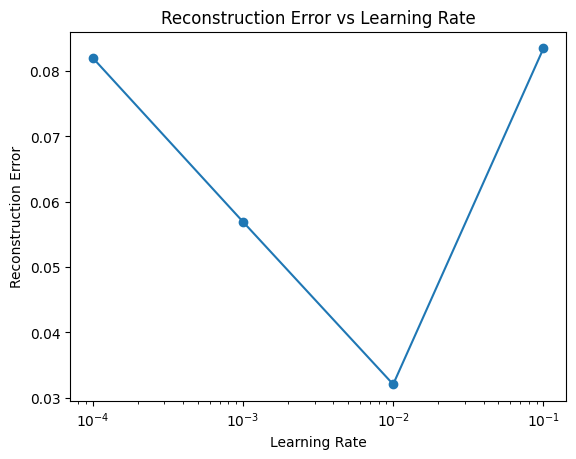

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses all TensorFlow logs, shows only errors

# Import necessary libraries
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)
import random
random.seed(42)

# Define the function to create an autoencoder
def create_autoencoder(input_dim, encoded_dim, learning_rate):
    input_layer = Input(shape=(input_dim,))
    # Change the activation function from 'relu' to 'tanh'
    encoded = Dense(encoded_dim, activation='tanh')(input_layer)
    # Add another dense layer
    decoded = Dense(input_dim, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(Adam(learning_rate), loss='mean_squared_error')
    return autoencoder

# Simulate training and testing data (randomly generated for the example)
x_train = np.random.random((1000, 32))
x_test = np.random.random((300, 32))

# Initialize list to store reconstruction errors
reconstruction_errors = []

# Train and test autoencoders with different learning rates
for lr in [0.1, 0.01, 0.001, 0.0001]:
    autoencoder = create_autoencoder(32, 20, lr)
    autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
    decoded_imgs = autoencoder.predict(x_test)
    reconstruction_error = np.mean((x_test - decoded_imgs) ** 2)
    reconstruction_errors.append((lr, reconstruction_error))

# Plot reconstruction error vs learning rates
plt.plot([lr for lr, _ in reconstruction_errors], [error for _, error in reconstruction_errors], marker='o')
plt.title('Reconstruction Error vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Reconstruction Error')
plt.xscale('log')
plt.show()

## Creating an Autoencoder with Optimal Learning Rate

Now, let's deepen our exploration into the effect of learning rates on autoencoder performance. Your task is to create two autoencoders with different learning rates and compare their reconstruction errors. This experiment will highlight how significant the choice of learning rate can be for the model's ability to learn effectively. Craft each autoencoder, train them on the same dataset, and let the reconstruction errors reveal the impact of your chosen learning rates!

In [7]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.random.set_seed(42)
import numpy as np
np.random.seed(42)
import random
random.seed(42)


# Define the function to create an autoencoder
def create_autoencoder(input_dim, encoded_dim, learning_rate):
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(encoded_dim, activation='relu')(input_layer)
    encoded = Dense(encoded_dim, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate), loss='mean_squared_error')
    return autoencoder

# Simulate training and testing data with input dimension 32
x_train = np.random.random((1000, 32))
x_test = np.random.random((300, 32))

# Initialize two different learning rates for the experiment
learning_rate_high = 0.01
learning_rate_low = 0.001

# Create the first autoencoder with a higher learning rate, train it, and calculate its reconstruction error with encoded dimension set to 24
autoencoder_high_lr = create_autoencoder(input_dim=32, encoded_dim=24, learning_rate=learning_rate_high)
autoencoder_high_lr.fit(x_train, x_train, epochs=50, batch_size=32, shuffle=True, verbose=0)
reconstructed_high_lr = autoencoder_high_lr.predict(x_test)
reconstruction_error_high_lr = np.mean(np.square(x_test - reconstructed_high_lr))

# Create the second autoencoder with a lower learning rate, train it, and calculate its reconstruction error with the same setup as the previous one
autoencoder_low_lr = create_autoencoder(input_dim=32, encoded_dim=24, learning_rate=learning_rate_low)
autoencoder_low_lr.fit(x_train, x_train, epochs=50, batch_size=32, shuffle=True, verbose=0)
reconstructed_low_lr = autoencoder_low_lr.predict(x_test)
reconstruction_error_low_lr = np.mean(np.square(x_test - reconstructed_low_lr))

# Compare and print the reconstruction errors to see the effect of learning rates on model performance
print(f"Reconstruction error with high learning rate ({learning_rate_high}): {reconstruction_error_high_lr}")
print(f"Reconstruction error with low learning rate ({learning_rate_low}): {reconstruction_error_low_lr}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Reconstruction error with high learning rate (0.01): 0.044750296121086754
Reconstruction error with low learning rate (0.001): 0.03732680474659947
